In [1]:
import pandas as pd
import glob
import os
import streamlit as st

C:\Users\hamid\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\hamid\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [2]:


# # Get all .xls files in the current directory
# files = glob.glob("*.xls")  

# # Loop through each file
# for file in files:
#     try:
#         # Read the HTML table from the file
#         tables = pd.read_html(file)
        
#         # If there are multiple tables, use the first one
#         df = tables[0]  
        
#         # Define the CSV file name (same as .xls but with .csv extension)
#         csv_filename = os.path.splitext(file)[0] + ".csv"
        
#         # Save DataFrame as CSV
#         df.to_csv(csv_filename, index=False, encoding="utf-8")
        
#         print(f"Converted: {file} -> {csv_filename}")
    
#     except Exception as e:
#         print(f"Error processing {file}: {e}")


In [3]:
df1 = pd.read_csv('grafico-delle-catture (Cicalino 1).csv')
df2 = pd.read_csv('grafico-delle-catture (Cicalino 2).csv')
df3 = pd.read_csv('grafico-delle-catture (Imola 1).csv')
df4 = pd.read_csv('grafico-delle-catture (Imola 2).csv')
df5 = pd.read_csv('grafico-delle-catture (Imola 3).csv')

In [4]:
df1.head(10)

,DateTime,Numero di insetti,Nuove catture (per evento),Recensito,Evento
0,06.07.2024 06:01:00,0.0,0.0,Si,NaN
1,07.07.2024 06:04:00,0.0,0.0,Si,NaN
2,08.07.2024 06:03:00,0.0,0.0,Si,NaN
3,09.07.2024 06:05:00,0.0,0.0,Si,NaN
4,09.07.2024 06:13:59,NaN,NaN,Si,Cleaning
5,10.07.2024 06:03:00,0.0,0.0,Si,NaN
6,11.07.2024 06:01:00,0.0,0.0,Si,NaN
7,12.07.2024 06:05:00,0.0,0.0,Si,NaN
8,13.07.2024 06:02:00,0.0,0.0,Si,NaN
9,14.07.2024 06:01:00,1.0,1.0,Si,NaN


In [5]:
import pandas as pd

def separate_data(df):
    """
    Separates the DataFrame into two: 
    1. Regular data (excluding 'Cleaning' events)
    2. Cleaning event data
    
    Args:
        df (pd.DataFrame): Input DataFrame with 'Evento' column.
        
    Returns:
        tuple: (regular_data, cleaning_data)
    """
    # Ensure DateTime is in proper format
    df['DateTime'] = pd.to_datetime(df['DateTime'], format='%d.%m.%Y %H:%M:%S', errors='coerce')
    
    # Separate date and time
    df['Date'] = df['DateTime'].dt.date
    df['Time'] = df['DateTime'].dt.time
    
    df = df.drop(columns=['DateTime'])
    
    return df

# Example usage:
# regular_df, cleaning_df = separate_data(df)


In [6]:
df1 = separate_data(df1)
df2 = separate_data(df2)
df3 = separate_data(df3)
df4 = separate_data(df4)
df5 = separate_data(df5)

In [7]:
df1.head(20)

,Numero di insetti,Nuove catture (per evento),Recensito,Evento,Date,Time
0,0.0,0.0,Si,NaN,2024-07-06,06:01:00
1,0.0,0.0,Si,NaN,2024-07-07,06:04:00
2,0.0,0.0,Si,NaN,2024-07-08,06:03:00
3,0.0,0.0,Si,NaN,2024-07-09,06:05:00
4,NaN,NaN,Si,Cleaning,2024-07-09,06:13:59
5,0.0,0.0,Si,NaN,2024-07-10,06:03:00
6,0.0,0.0,Si,NaN,2024-07-11,06:01:00
7,0.0,0.0,Si,NaN,2024-07-12,06:05:00
8,0.0,0.0,Si,NaN,2024-07-13,06:02:00
9,1.0,1.0,Si,NaN,2024-07-14,06:01:00


In [8]:
df1['Time'] = pd.to_datetime(df1['Time'], format='%H:%M:%S').dt.strftime('%H:00:00')
df2['Time'] = pd.to_datetime(df2['Time'], format='%H:%M:%S').dt.strftime('%H:00:00')
df3['Time'] = pd.to_datetime(df3['Time'], format='%H:%M:%S').dt.strftime('%H:00:00')
df4['Time'] = pd.to_datetime(df4['Time'], format='%H:%M:%S').dt.strftime('%H:00:00')
df5['Time'] = pd.to_datetime(df5['Time'], format='%H:%M:%S').dt.strftime('%H:00:00')

In [9]:
df1.head()

,Numero di insetti,Nuove catture (per evento),Recensito,Evento,Date,Time
0,0.0,0.0,Si,NaN,2024-07-06,06:00:00
1,0.0,0.0,Si,NaN,2024-07-07,06:00:00
2,0.0,0.0,Si,NaN,2024-07-08,06:00:00
3,0.0,0.0,Si,NaN,2024-07-09,06:00:00
4,NaN,NaN,Si,Cleaning,2024-07-09,06:00:00


In [10]:
df2.head()

,Numero di insetti,Nuove catture (per evento),Recensito,Evento,Date,Time
0,0.0,0.0,Si,NaN,2024-07-05,11:00:00
1,0.0,0.0,Si,NaN,2024-07-06,03:00:00
2,0.0,0.0,Si,NaN,2024-07-07,03:00:00
3,0.0,0.0,Si,NaN,2024-07-08,03:00:00
4,NaN,NaN,Si,Cleaning,2024-07-08,03:00:00


In [11]:
df3.head()

,Numero di insetti,Nuove catture (per evento),Recensito,Evento,Date,Time
0,0.0,0.0,Si,NaN,2024-07-30,22:00:00
1,0.0,0.0,Si,NaN,2024-07-31,22:00:00
2,0.0,0.0,Si,NaN,2024-08-01,22:00:00
3,0.0,0.0,Si,NaN,2024-08-02,22:00:00
4,0.0,0.0,Si,NaN,2024-08-03,22:00:00


In [12]:
df4.head()

,Numero di insetti,Nuove catture (per evento),Recensito,Evento,Date,Time
0,0.0,0.0,Si,NaN,2024-07-31,00:00:00
1,0.0,0.0,Si,NaN,2024-08-01,00:00:00
2,0.0,0.0,Si,NaN,2024-08-02,00:00:00
3,0.0,0.0,Si,NaN,2024-08-03,00:00:00
4,NaN,NaN,Si,Cleaning,2024-08-03,00:00:00


In [13]:
df1["Location"] = "cicalino1"
df2["Location"] = "cicalino2"
df3["Location"] = "Imola1"
df4["Location"] = "Imola2"
df5["Location"] = "Imola3"

In [14]:
df1.head()

,Numero di insetti,Nuove catture (per evento),Recensito,Evento,Date,Time,Location
0,0.0,0.0,Si,NaN,2024-07-06,06:00:00,cicalino1
1,0.0,0.0,Si,NaN,2024-07-07,06:00:00,cicalino1
2,0.0,0.0,Si,NaN,2024-07-08,06:00:00,cicalino1
3,0.0,0.0,Si,NaN,2024-07-09,06:00:00,cicalino1
4,NaN,NaN,Si,Cleaning,2024-07-09,06:00:00,cicalino1


In [15]:


def merge_dataframes(df1, df2, df3, df4 , df5):
    return pd.concat([df1, df2, df3, df4 , df5], ignore_index=True)


df = merge_dataframes(df1, df2, df3, df4, df5)


In [16]:
df

,Numero di insetti,Nuove catture (per evento),Recensito,Evento,Date,Time,Location
0,0.0,0.0,Si,NaN,2024-07-06,06:00:00,cicalino1
1,0.0,0.0,Si,NaN,2024-07-07,06:00:00,cicalino1
2,0.0,0.0,Si,NaN,2024-07-08,06:00:00,cicalino1
3,0.0,0.0,Si,NaN,2024-07-09,06:00:00,cicalino1
4,NaN,NaN,Si,Cleaning,2024-07-09,06:00:00,cicalino1
...,...,...,...,...,...,...,...
173,0.0,0.0,Si,NaN,2024-08-19,00:00:00,Imola3
174,1.0,1.0,Si,NaN,2024-08-20,00:00:00,Imola3
175,1.0,0.0,Si,NaN,2024-08-21,00:00:00,Imola3
176,2.0,1.0,Si,NaN,2024-08-22,00:00:00,Imola3


In [17]:
dft1 = pd.read_csv('dati-meteo-storici (Cicalino 1).csv')
dft2 = pd.read_csv('dati-meteo-storici (Cicalino 2).csv')
dft3 = pd.read_csv('dati-meteo-storici (Imola 1).csv')
dft4 = pd.read_csv('dati-meteo-storici (Imola 2).csv')
dft5 = pd.read_csv('dati-meteo-storici (Imola 3).csv')

In [18]:
dft1.head()

,DateTime,Media Temperatura,Temperatura Intervallo,Temperatura Intervallo.1,Media Umidità
0,DateTime,Media Temperatura,low,high,Media Umidità
1,05.07.2024 15:00:00,3165,311,322,3708
2,05.07.2024 16:00:00,3145,31,322,3355
3,05.07.2024 17:00:00,3166,312,321,3498
4,05.07.2024 18:00:00,3008,292,308,4239


In [19]:
dft1["Location"] = "cicalino1"
dft2["Location"] = "cicalino2"
dft3["Location"] = "Imola1"
dft4["Location"] = "Imola2"
dft5["Location"] = "Imola3"

In [20]:
dft1.head()

,DateTime,Media Temperatura,Temperatura Intervallo,Temperatura Intervallo.1,Media Umidità,Location
0,DateTime,Media Temperatura,low,high,Media Umidità,cicalino1
1,05.07.2024 15:00:00,3165,311,322,3708,cicalino1
2,05.07.2024 16:00:00,3145,31,322,3355,cicalino1
3,05.07.2024 17:00:00,3166,312,321,3498,cicalino1
4,05.07.2024 18:00:00,3008,292,308,4239,cicalino1


In [21]:
dft1 = separate_data(dft1)
dft2 = separate_data(dft2)
dft3 = separate_data(dft3)
dft4 = separate_data(dft4)
dft5 = separate_data(dft5)

In [22]:
dft1

,Media Temperatura,Temperatura Intervallo,Temperatura Intervallo.1,Media Umidità,Location,Date,Time
0,Media Temperatura,low,high,Media Umidità,cicalino1,NaT,NaT
1,3165,311,322,3708,cicalino1,2024-07-05,15:00:00
2,3145,31,322,3355,cicalino1,2024-07-05,16:00:00
3,3166,312,321,3498,cicalino1,2024-07-05,17:00:00
4,3008,292,308,4239,cicalino1,2024-07-05,18:00:00
...,...,...,...,...,...,...,...
1164,1957,195,198,8725,cicalino1,2024-08-23,02:00:00
1165,1992,197,202,8689,cicalino1,2024-08-23,03:00:00
1166,1957,19,198,8857,cicalino1,2024-08-23,04:00:00
1167,1858,184,189,9214,cicalino1,2024-08-23,05:00:00


In [23]:
dft1 = dft1.drop(0).reset_index(drop=True)
dft2 = dft2.drop(0).reset_index(drop=True)
dft3 = dft3.drop(0).reset_index(drop=True)
dft4 = dft4.drop(0).reset_index(drop=True)
dft5 = dft5.drop(0).reset_index(drop=True)

In [24]:
dft1

,Media Temperatura,Temperatura Intervallo,Temperatura Intervallo.1,Media Umidità,Location,Date,Time
0,3165,311,322,3708,cicalino1,2024-07-05,15:00:00
1,3145,31,322,3355,cicalino1,2024-07-05,16:00:00
2,3166,312,321,3498,cicalino1,2024-07-05,17:00:00
3,3008,292,308,4239,cicalino1,2024-07-05,18:00:00
4,2878,265,296,4754,cicalino1,2024-07-05,19:00:00
...,...,...,...,...,...,...,...
1163,1957,195,198,8725,cicalino1,2024-08-23,02:00:00
1164,1992,197,202,8689,cicalino1,2024-08-23,03:00:00
1165,1957,19,198,8857,cicalino1,2024-08-23,04:00:00
1166,1858,184,189,9214,cicalino1,2024-08-23,05:00:00


In [25]:
def correct_temperature_and_humidity(df):
    # List of relevant columns to check and correct
    required_columns = ['Media Temperatura', 'Temperatura Intervallo', 'Temperatura Intervallo.1', 'Media Umidità']
    
    # Check if the required columns exist in the dataframe
    for col in required_columns:
        if col not in df.columns:
            print(f"Warning: Column '{col}' is missing in the dataframe!")
            return df  # Return the dataframe unmodified if any column is missing

    # Step 4: Correct the temperature and humidity values
    df['Media Temperatura'] = df['Media Temperatura'].astype(str).str[:2] + '.' + df['Media Temperatura'].astype(str).str[2:]
    df['Temperatura Intervallo'] = df['Temperatura Intervallo'].astype(str).str[:2] + '.' + df['Temperatura Intervallo'].astype(str).str[2:]
    df['Temperatura Intervallo.1'] = df['Temperatura Intervallo.1'].astype(str).str[:2] + '.' + df['Temperatura Intervallo.1'].astype(str).str[2:]
    df['Media Umidità'] = df['Media Umidità'].astype(str).str[:2] + '.' + df['Media Umidità'].astype(str).str[2:]

    # Step 5: Convert corrected values back to numeric type
    df['Media Temperatura'] = pd.to_numeric(df['Media Temperatura'], errors='coerce')
    df['Temperatura Intervallo'] = pd.to_numeric(df['Temperatura Intervallo'], errors='coerce')
    df['Temperatura Intervallo.1'] = pd.to_numeric(df['Temperatura Intervallo.1'], errors='coerce')
    df['Media Umidità'] = pd.to_numeric(df['Media Umidità'], errors='coerce')

    return df


In [26]:
# Example: Applying the function to four datasets
dft1 = correct_temperature_and_humidity(dft1)
dft2 = correct_temperature_and_humidity(dft2)
dft3 = correct_temperature_and_humidity(dft3)
dft4 = correct_temperature_and_humidity(dft4)
dft5 = correct_temperature_and_humidity(dft5)

In [27]:
dft4.head()

,Media Temperatura,Temperatura Intervallo,Temperatura Intervallo.1,Media Umidità,Location,Date,Time
0,33.64,33.5,34.0,35.86,Imola2,2024-07-30,17:00:00
1,33.25,32.9,33.5,34.76,Imola2,2024-07-30,18:00:00
2,32.69,30.9,33.4,33.67,Imola2,2024-07-30,19:00:00
3,29.39,28.2,30.5,38.83,Imola2,2024-07-30,20:00:00
4,27.58,27.0,28.1,41.18,Imola2,2024-07-30,21:00:00


In [28]:
dft2.head()

,Media Temperatura,Temperatura Intervallo,Temperatura Intervallo.1,Media Umidità,Location,Date,Time
0,17.00,17.0,17.0,86.60,cicalino2,2024-07-11,01:00:00
1,16.32,15.7,16.9,86.83,cicalino2,2024-07-11,02:00:00
2,15.47,15.4,15.6,87.32,cicalino2,2024-07-11,03:00:00
3,14.67,14.4,15.2,88.19,cicalino2,2024-07-11,04:00:00
4,14.54,14.4,14.7,87.45,cicalino2,2024-07-11,05:00:00


In [29]:

def fix_temperature_format(df):

    # Rename columns to English
    df.rename(columns={
        "Media Temperatura": "Avg Temperature",
        "Temperatura Intervallo": "Temperature Low",
        "Temperatura Intervallo.1": "Temperature High",
        "Media Umidità": "Avg Humidity",
        "Location": "Location",
        "Date": "Date",
        "Time": "Time"
    }, inplace=True)

    return df



In [30]:
dft1 = fix_temperature_format(dft1)
dft2 = fix_temperature_format(dft2)
dft3 = fix_temperature_format(dft3)
dft4 = fix_temperature_format(dft4)
dft5 = fix_temperature_format(dft5)



In [31]:
dft1.head()

,Avg Temperature,Temperature Low,Temperature High,Avg Humidity,Location,Date,Time
0,31.65,31.1,32.2,37.08,cicalino1,2024-07-05,15:00:00
1,31.45,31.0,32.2,33.55,cicalino1,2024-07-05,16:00:00
2,31.66,31.2,32.1,34.98,cicalino1,2024-07-05,17:00:00
3,30.08,29.2,30.8,42.39,cicalino1,2024-07-05,18:00:00
4,28.78,26.5,29.6,47.54,cicalino1,2024-07-05,19:00:00


In [32]:
import pandas as pd

def calculate_daily_stats(df):
    # Calculate the values for each date based on Location

    # Calculate average temperature for each Location and Date
    df['Avg Temperature'] = df.groupby(['Location', 'Date'])['Avg Temperature'].transform('mean')

    # Calculate minimum temperature based on Temperature Low for each Location and Date
    df['Min Temperature'] = df.groupby(['Location', 'Date'])['Temperature Low'].transform('min')

    # Calculate maximum temperature based on Temperature High for each Location and Date
    df['Max Temperature'] = df.groupby(['Location', 'Date'])['Temperature High'].transform('max')

    # Calculate average humidity for each Location and Date
    df['Avg Humidity'] = df.groupby(['Location', 'Date'])['Avg Humidity'].transform('mean')

    return df

In [33]:
# Applying the function to each dataset
dft1 = calculate_daily_stats(dft1)
dft2 = calculate_daily_stats(dft2)
dft3 = calculate_daily_stats(dft3)
dft4 = calculate_daily_stats(dft4)
dft5 = calculate_daily_stats(dft5)

In [34]:
dft1.head()

,Avg Temperature,Temperature Low,Temperature High,Avg Humidity,Location,Date,Time,Min Temperature,Max Temperature
0,25.777778,31.1,32.2,56.674444,cicalino1,2024-07-05,15:00:00,16.0,32.2
1,25.777778,31.0,32.2,56.674444,cicalino1,2024-07-05,16:00:00,16.0,32.2
2,25.777778,31.2,32.1,56.674444,cicalino1,2024-07-05,17:00:00,16.0,32.2
3,25.777778,29.2,30.8,56.674444,cicalino1,2024-07-05,18:00:00,16.0,32.2
4,25.777778,26.5,29.6,56.674444,cicalino1,2024-07-05,19:00:00,16.0,32.2


In [35]:
def select_sample_and_remove_time(df):
    # Group by 'Location' and 'Date' and select the first sample from each group
    df = df.groupby(['Location', 'Date'], as_index=False).first()

    # Drop the 'Time' column
    df = df.drop(columns=['Time'])

    return df

In [36]:
# Apply the function to each dataset
dft1 = select_sample_and_remove_time(dft1)
dft2 = select_sample_and_remove_time(dft2)
dft3 = select_sample_and_remove_time(dft3)
dft4 = select_sample_and_remove_time(dft4)
dft5 = select_sample_and_remove_time(dft5)

In [37]:
def droping(df):

    # Drop the 'Time' column
    df = df.drop(columns=['Temperature Low','Temperature High'])

    return df

In [38]:
dft1 = droping(dft1)
dft2 = droping(dft2)
dft3 = droping(dft3)
dft4 = droping(dft4)
dft5 = droping(dft5)

In [39]:
dft1.head()

,Location,Date,Avg Temperature,Avg Humidity,Min Temperature,Max Temperature
0,cicalino1,2024-07-05,25.777778,56.674444,16.0,32.2
1,cicalino1,2024-07-06,22.342500,72.247500,13.6,30.6
2,cicalino1,2024-07-07,23.517917,76.728750,18.7,30.2
3,cicalino1,2024-07-08,25.669167,69.143750,18.3,33.9
4,cicalino1,2024-07-09,25.870000,53.647083,15.0,36.0


In [40]:
dft = merge_dataframes(dft1, dft2, dft3, dft4, dft5)

In [41]:
dft.head(100)

,Location,Date,Avg Temperature,Avg Humidity,Min Temperature,Max Temperature
0,cicalino1,2024-07-05,25.777778,56.674444,16.0,32.2
1,cicalino1,2024-07-06,22.342500,72.247500,13.6,30.6
2,cicalino1,2024-07-07,23.517917,76.728750,18.7,30.2
3,cicalino1,2024-07-08,25.669167,69.143750,18.3,33.9
4,cicalino1,2024-07-09,25.870000,53.647083,15.0,36.0
...,...,...,...,...,...,...
95,Imola1,2024-07-31,29.017083,51.392083,20.2,38.7
96,Imola1,2024-08-01,31.076667,44.148333,22.5,39.7
97,Imola1,2024-08-02,27.973750,65.758750,20.1,37.3
98,Imola1,2024-08-03,25.766667,71.852083,20.4,32.1


In [42]:
df = df.drop(columns=['Time'])


In [43]:
df.head(100)

,Numero di insetti,Nuove catture (per evento),Recensito,Evento,Date,Location
0,0.0,0.0,Si,NaN,2024-07-06,cicalino1
1,0.0,0.0,Si,NaN,2024-07-07,cicalino1
2,0.0,0.0,Si,NaN,2024-07-08,cicalino1
3,0.0,0.0,Si,NaN,2024-07-09,cicalino1
4,NaN,NaN,Si,Cleaning,2024-07-09,cicalino1
...,...,...,...,...,...,...
95,0.0,0.0,Si,NaN,2024-08-04,cicalino2
96,0.0,0.0,Si,NaN,2024-08-05,cicalino2
97,0.0,0.0,Si,NaN,2024-08-06,cicalino2
98,0.0,0.0,Si,NaN,2024-08-07,cicalino2


In [44]:
df = df.drop(columns=['Recensito'])


In [45]:
def mark_cleaning_dates(df):
    # Step 1: Identify dates with 'Cleaning'
    cleaning_dates = df[df['Evento'] == 'Cleaning']['Date'].unique()
    
    # Step 2: Create a new column 'Cleaning_Flag'
    df['Cleaning_Flag'] = df['Date'].apply(lambda x: 1 if x in cleaning_dates else 0)
    
    return df




In [48]:
# Apply to your dataset
df = mark_cleaning_dates(df)

In [50]:
df = df.drop(columns=['Evento'])


In [53]:
df = df.dropna()

In [55]:
def rename_insect_columns(df):
    df.rename(columns={
        "Numero di insetti": "Number of Insects",
        "Nuove catture (per evento)": "New Captures (per Event)"
    }, inplace=True)
    return df

# Apply to your dataset
df = rename_insect_columns(df)


In [64]:
df.head(10)

,Location,Date,Avg Temperature,Avg Humidity,Min Temperature,Max Temperature,Number of Insects,New Captures (per Event),Cleaning_Flag
0,cicalino1,2024-07-06,22.342500,72.247500,13.6,30.6,0.0,0,0
1,cicalino1,2024-07-07,23.517917,76.728750,18.7,30.2,0.0,0,0
2,cicalino1,2024-07-08,25.669167,69.143750,18.3,33.9,0.0,0,1
3,cicalino1,2024-07-09,25.870000,53.647083,15.0,36.0,0.0,0,1
4,cicalino1,2024-07-10,26.410000,58.943750,15.0,36.2,0.0,0,0
5,cicalino1,2024-07-11,26.262500,54.386250,15.9,35.9,0.0,0,1
6,cicalino1,2024-07-12,26.169583,57.745417,16.4,35.2,0.0,0,0
7,cicalino1,2024-07-13,25.491667,69.137083,18.2,34.2,0.0,0,0
8,cicalino1,2024-07-14,25.960417,68.728750,16.9,35.9,1.0,1,0
9,cicalino1,2024-07-15,26.975833,57.115833,16.2,37.1,1.0,0,0


In [57]:
data = pd.merge(dft, df, on=["Date", "Location"], how="inner")


In [63]:
data.head(10)

,Location,Date,Avg Temperature,Avg Humidity,Min Temperature,Max Temperature,Number of Insects,New Captures (per Event),Cleaning_Flag
0,cicalino1,2024-07-06,22.342500,72.247500,13.6,30.6,0.0,0,0
1,cicalino1,2024-07-07,23.517917,76.728750,18.7,30.2,0.0,0,0
2,cicalino1,2024-07-08,25.669167,69.143750,18.3,33.9,0.0,0,1
3,cicalino1,2024-07-09,25.870000,53.647083,15.0,36.0,0.0,0,1
4,cicalino1,2024-07-10,26.410000,58.943750,15.0,36.2,0.0,0,0
5,cicalino1,2024-07-11,26.262500,54.386250,15.9,35.9,0.0,0,1
6,cicalino1,2024-07-12,26.169583,57.745417,16.4,35.2,0.0,0,0
7,cicalino1,2024-07-13,25.491667,69.137083,18.2,34.2,0.0,0,0
8,cicalino1,2024-07-14,25.960417,68.728750,16.9,35.9,1.0,1,0
9,cicalino1,2024-07-15,26.975833,57.115833,16.2,37.1,1.0,0,0


In [61]:
df = data

In [62]:
# Convert 'New Captures (per Event)' to binary classification target
df['New Captures (per Event)'] = df['New Captures (per Event)'].apply(lambda x: 0 if x == 0 else 1)


In [88]:
df['temp_change'] = df['Max Temperature'] - df_clean['Min Temperature']




In [90]:
df.head(10)

,Location,Date,Avg Temperature,Avg Humidity,Min Temperature,Max Temperature,Number of Insects,New Captures (per Event),Cleaning_Flag,temp_change
0,cicalino1,2024-07-06,22.342500,72.247500,13.6,30.6,0.0,0,0,17.0
1,cicalino1,2024-07-07,23.517917,76.728750,18.7,30.2,0.0,0,0,11.5
2,cicalino1,2024-07-08,25.669167,69.143750,18.3,33.9,0.0,0,1,15.6
3,cicalino1,2024-07-09,25.870000,53.647083,15.0,36.0,0.0,0,1,21.0
4,cicalino1,2024-07-10,26.410000,58.943750,15.0,36.2,0.0,0,0,21.2
5,cicalino1,2024-07-11,26.262500,54.386250,15.9,35.9,0.0,0,1,20.0
6,cicalino1,2024-07-12,26.169583,57.745417,16.4,35.2,0.0,0,0,18.8
7,cicalino1,2024-07-13,25.491667,69.137083,18.2,34.2,0.0,0,0,16.0
8,cicalino1,2024-07-14,25.960417,68.728750,16.9,35.9,1.0,1,0,19.0
9,cicalino1,2024-07-15,26.975833,57.115833,16.2,37.1,1.0,0,0,20.9


In [91]:
# Basic Info
print(df.info())

# Summary Statistics
print(df.describe())

# Check for Missing Values
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Location                  148 non-null    object        
 1   Date                      148 non-null    datetime64[ns]
 2   Avg Temperature           148 non-null    float64       
 3   Avg Humidity              148 non-null    float64       
 4   Min Temperature           148 non-null    float64       
 5   Max Temperature           148 non-null    float64       
 6   Number of Insects         148 non-null    float64       
 7   New Captures (per Event)  148 non-null    int64         
 8   Cleaning_Flag             148 non-null    int64         
 9   temp_change               148 non-null    float64       
dtypes: datetime64[ns](1), float64(6), int64(2), object(1)
memory usage: 11.7+ KB
None
                      Date  Avg Temperature  Avg Humidity  Min T

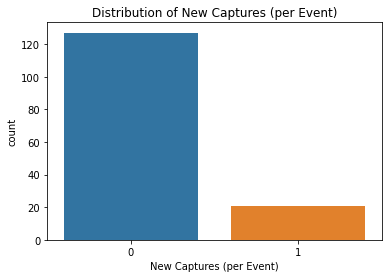

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of Target Variable
sns.countplot(x='New Captures (per Event)', data=df)
plt.title('Distribution of New Captures (per Event)')
plt.show()


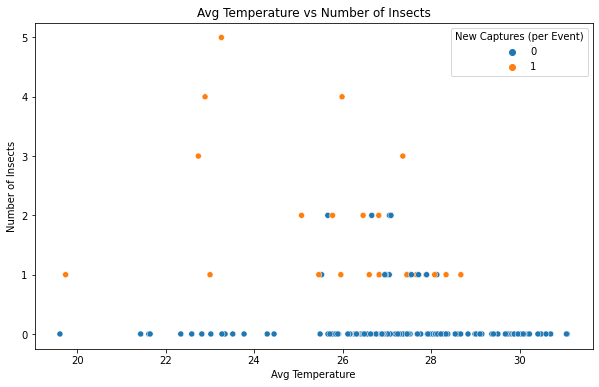

In [93]:
# Temperature vs Insect Captures
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Avg Temperature', y='Number of Insects', hue='New Captures (per Event)', data=df)
plt.title('Avg Temperature vs Number of Insects')
plt.show()


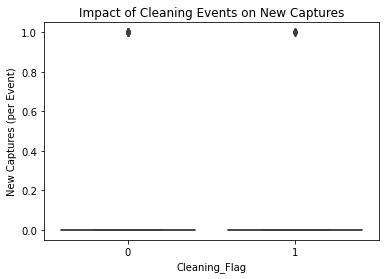

In [94]:
# New Captures Based on Cleaning Events
sns.boxplot(x='Cleaning_Flag', y='New Captures (per Event)', data=df)
plt.title('Impact of Cleaning Events on New Captures')
plt.show()


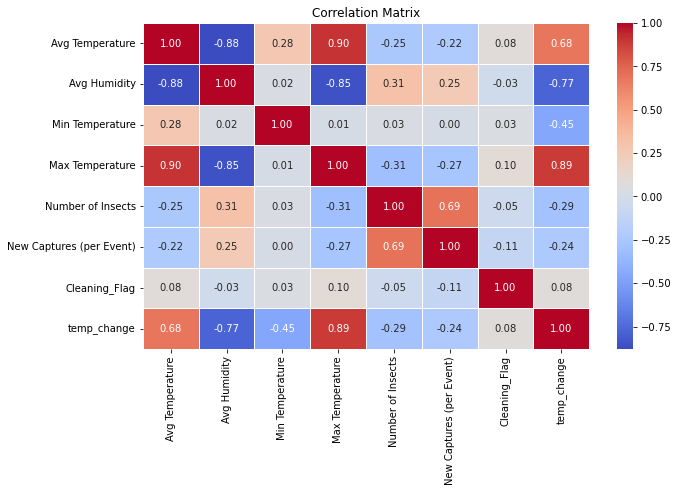

In [103]:
# Drop 'Location' and 'Date' columns
df_numeric = df_clean.drop(columns=['Location', 'Date'])

# Calculate the correlation matrix
correlation_matrix = df_numeric.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [95]:
df_clean = df


Classification Report:
               precision    recall  f1-score   support

           0       0.83      1.00      0.91        35
           1       1.00      0.30      0.46        10

    accuracy                           0.84        45
   macro avg       0.92      0.65      0.69        45
weighted avg       0.87      0.84      0.81        45

Confusion Matrix:
 [[35  0]
 [ 7  3]]
ROC AUC Score: 0.65


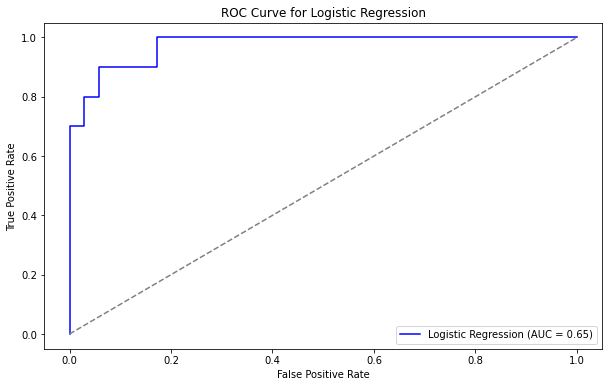

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Features and target
X = df_clean[['Avg Temperature', 'Avg Humidity', 'Min Temperature', 'Max Temperature', 'Number of Insects', 'Cleaning_Flag', 'temp_change']]
y = df_clean['New Captures (per Event)']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate and train the Logistic Regression model
logreg = LogisticRegression(solver='liblinear', random_state=42)
logreg.fit(X_train, y_train)

# Predictions and evaluation
y_pred = logreg.predict(X_test)

# Evaluation metrics
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:, 1])
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='Logistic Regression (AUC = %0.2f)' % roc_auc_score(y_test, y_pred))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.show()


Classification Report:
               precision    recall  f1-score   support

           0       0.81      1.00      0.90        35
           1       1.00      0.20      0.33        10

    accuracy                           0.82        45
   macro avg       0.91      0.60      0.62        45
weighted avg       0.86      0.82      0.77        45

Confusion Matrix:
 [[35  0]
 [ 8  2]]
ROC AUC Score: 0.6


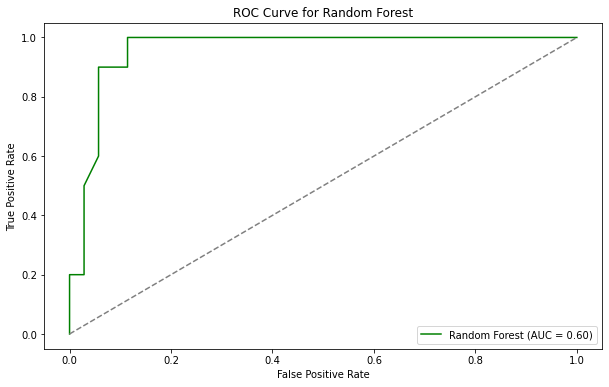

In [97]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate and train the Random Forest model
rf = RandomForestClassifier(random_state=42, class_weight='balanced')  # class_weight='balanced' for handling class imbalance
rf.fit(X_train, y_train)

# Predictions and evaluation
y_pred = rf.predict(X_test)

# Evaluation metrics
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='green', label='Random Forest (AUC = %0.2f)' % roc_auc_score(y_test, y_pred))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend(loc='lower right')
plt.show()


In [98]:
# !pip install xgboost

Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.93        35
           1       1.00      0.50      0.67        10

    accuracy                           0.89        45
   macro avg       0.94      0.75      0.80        45
weighted avg       0.90      0.89      0.87        45

Confusion Matrix:
 [[35  0]
 [ 5  5]]
ROC AUC Score: 0.75


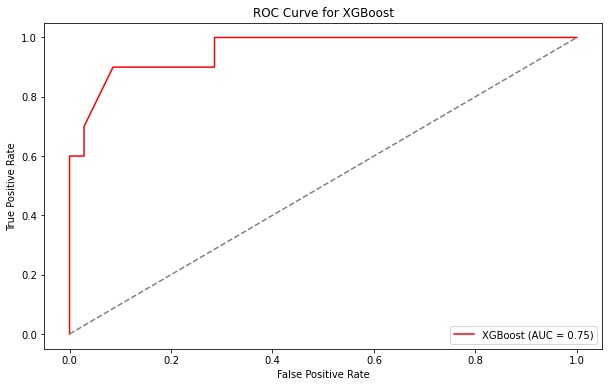

In [99]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate and train the XGBoost model
xgb_model = xgb.XGBClassifier(scale_pos_weight=1, random_state=42)  # scale_pos_weight helps handle imbalance
xgb_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = xgb_model.predict(X_test)

# Evaluation metrics
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, xgb_model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='red', label='XGBoost (AUC = %0.2f)' % roc_auc_score(y_test, y_pred))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost')
plt.legend(loc='lower right')
plt.show()


Classification Report:
               precision    recall  f1-score   support

           0       0.78      1.00      0.88        35
           1       0.00      0.00      0.00        10

    accuracy                           0.78        45
   macro avg       0.39      0.50      0.44        45
weighted avg       0.60      0.78      0.68        45

Confusion Matrix:
 [[35  0]
 [10  0]]
ROC AUC Score: 0.5


C:\Users\hamid\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hamid\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hamid\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


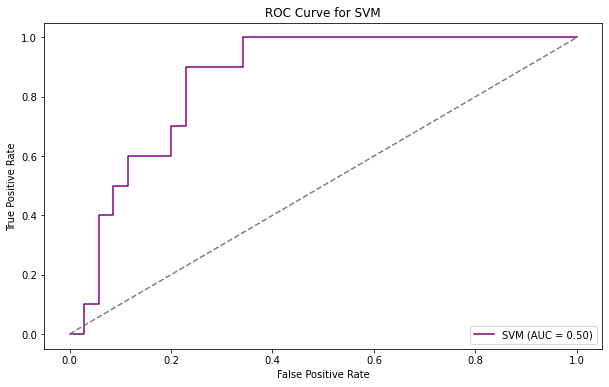

In [100]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate and train the SVM model
svm = SVC(kernel='rbf', probability=True, random_state=42)  # rbf kernel for non-linear separation
svm.fit(X_train, y_train)

# Predictions and evaluation
y_pred = svm.predict(X_test)

# Evaluation metrics
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, svm.predict_proba(X_test)[:, 1])
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='purple', label='SVM (AUC = %0.2f)' % roc_auc_score(y_test, y_pred))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM')
plt.legend(loc='lower right')
plt.show()


Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.97      0.86        35
           1       0.00      0.00      0.00        10

    accuracy                           0.76        45
   macro avg       0.39      0.49      0.43        45
weighted avg       0.60      0.76      0.67        45

Confusion Matrix:
 [[34  1]
 [10  0]]
ROC AUC Score: 0.4857142857142857


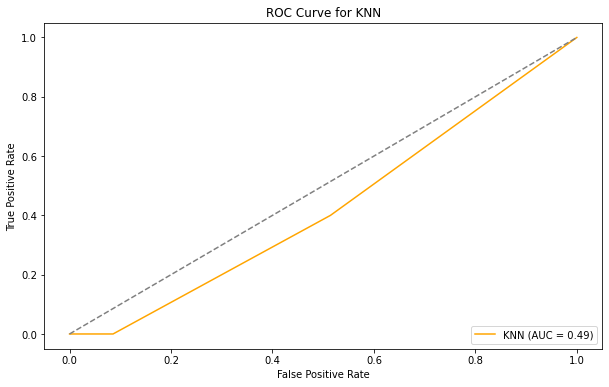

In [101]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate and train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predictions and evaluation
y_pred = knn.predict(X_test)

# Evaluation metrics
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:, 1])
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='orange', label='KNN (AUC = %0.2f)' % roc_auc_score(y_test, y_pred))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN')
plt.legend(loc='lower right')
plt.show()
